In [1]:
import torch
import numpy as np
from pathlib import Path
from tqdm.auto import tqdm

In [2]:
p_pts = sorted(Path('../outputs/debug/2024-09-23/125921/evals').glob('*.pt'), key=lambda x: ((s:=x.stem.split('_'))[0], int(s[1]), int(s[2])))
p_pts[:10]

[PosixPath('../outputs/debug/2024-09-23/125921/evals/0040187f-4627-4bfa-b141-89c1322fcd22_1_0_13.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/0040187f-4627-4bfa-b141-89c1322fcd22_1_1_13.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/0040187f-4627-4bfa-b141-89c1322fcd22_1_2_13.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/0040187f-4627-4bfa-b141-89c1322fcd22_1_3_13.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/0040187f-4627-4bfa-b141-89c1322fcd22_1_4_13.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/0040187f-4627-4bfa-b141-89c1322fcd22_1_5_13.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/0040187f-4627-4bfa-b141-89c1322fcd22_1_6_13.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/0040187f-4627-4bfa-b141-89c1322fcd22_1_7_13.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/0040187f-4627-4bfa-b141-89c1322fcd22_1_8_13.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/0040187f-4627-4bfa-b

In [11]:
outputs = {}
p_pts = list(Path('../outputs/debug/2024-09-23/125921/evals').glob('*.pt'))
# p_pts = sorted(Path('../outputs/debug/2024-09-23/125921/evals').glob('*.pt'), key=lambda x: ((s:=x.stem.split('_'))[0], int(s[1]), int(s[2]), int(s[3])))[:999]
display(p_pts[-5:])
for p_pt in tqdm(p_pts):
    annotation_uid, qset_id, seg_idx, num_segments = p_pt.stem.split('_')
    qset_uuid = f'{annotation_uid}_{qset_id}'
    if qset_uuid not in outputs:
        outputs[qset_uuid] = [None] * int(num_segments)
    outputs[qset_uuid][int(seg_idx)] = torch.load(p_pt)

new_outputs = {}
for qset_uuid, seg_features in tqdm(outputs.items(), total=len(outputs)):
    new_ret_bboxes, new_ret_scores, frame_idxs = [], [], []
    num_segments = len(seg_features)
    for seg_idx, seg_feature in enumerate(seg_features):
        assert seg_feature is not None, f'{qset_uuid}_{seg_idx}_{num_segments}'
        new_ret_bboxes.append(seg_feature['ret_bboxes'])
        new_ret_scores.append(seg_feature['ret_scores'])
        frame_idxs.append(seg_feature['frame_idxs'])
    frame_idxs = torch.cat(frame_idxs, dim=0)
    mask_duplicated = frame_idxs == torch.cat([torch.tensor([-1]), frame_idxs[:-1]])
    new_outputs[qset_uuid] = {
        'ret_bboxes': torch.cat(new_ret_bboxes, dim=0)[~mask_duplicated].numpy(),
        'ret_scores': torch.cat(new_ret_scores, dim=0)[~mask_duplicated].numpy(),
    }

[PosixPath('../outputs/debug/2024-09-23/125921/evals/0d7b0069-a8e9-493c-b123-51ebfa6f49d2_3_14_69.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/77a7203c-5a68-4fb5-ad62-48b2b820e32c_2_2_23.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/ebd74820-c8c0-4233-b203-dbb2aa8b4bdd_2_1_44.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/6d57de4e-302c-4c50-9442-7cd9a7f0b4e2_1_0_4.pt'),
 PosixPath('../outputs/debug/2024-09-23/125921/evals/11787056-71d0-43a2-972a-e26bbfb5abed_1_0_11.pt')]

  0%|          | 0/100416 [00:00<?, ?it/s]

/tmp/ipykernel_2806646/3373822454.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  outputs[qset_uuid][int(seg_idx)] = torch.load(p_pt)


  0%|          | 0/4504 [00:00<?, ?it/s]

In [4]:
new_outputs

{'0040187f-4627-4bfa-b141-89c1322fcd22_1': {'ret_bboxes': array([[ 2.27911949e+00,  9.12056274e+02,  1.38510727e+02,
           1.10357373e+03],
         [-8.97667408e-01,  9.04675964e+02,  1.94865677e+02,
           1.09299109e+03],
         [-8.99119377e-01,  8.99217896e+02,  2.10586197e+02,
           1.09276343e+03],
         ...,
         [ 2.24540949e+00,  9.60230591e+02,  1.99620987e+02,
           1.25026001e+03],
         [ 1.01118164e+02,  9.99847961e+02,  3.57400543e+02,
           1.22132166e+03],
         [-1.20069981e+00,  9.97085754e+02,  2.32616287e+02,
           1.25722144e+03]], dtype=float32),
  'ret_scores': array([ 1.8249454 ,  2.3930507 ,  2.5034552 ,  2.4962122 ,  2.7274408 ,
          2.6102376 ,  2.6508858 ,  2.6306512 ,  2.9003026 ,  3.190013  ,
          3.0450323 ,  2.7278402 ,  2.1935825 ,  1.4698142 ,  0.28019807,
         -0.7675489 , -0.11732175,  1.9531828 ,  2.4508357 ,  2.9876668 ,
          3.3675048 ,  3.3146527 ,  3.7429729 ,  3.6755586 ,  3.77761

array([[645.5425 , 180.06993, 846.9094 , 252.26581],
       [683.49194, 186.14401, 886.0824 , 302.29218],
       [687.98645, 188.35596, 919.9434 , 320.13748],
       [706.0369 , 188.76935, 948.6113 , 339.78152],
       [599.37427, 187.15298, 881.68054, 347.33966],
       [368.57825, 179.4043 , 711.26105, 345.32175]], dtype=float32)

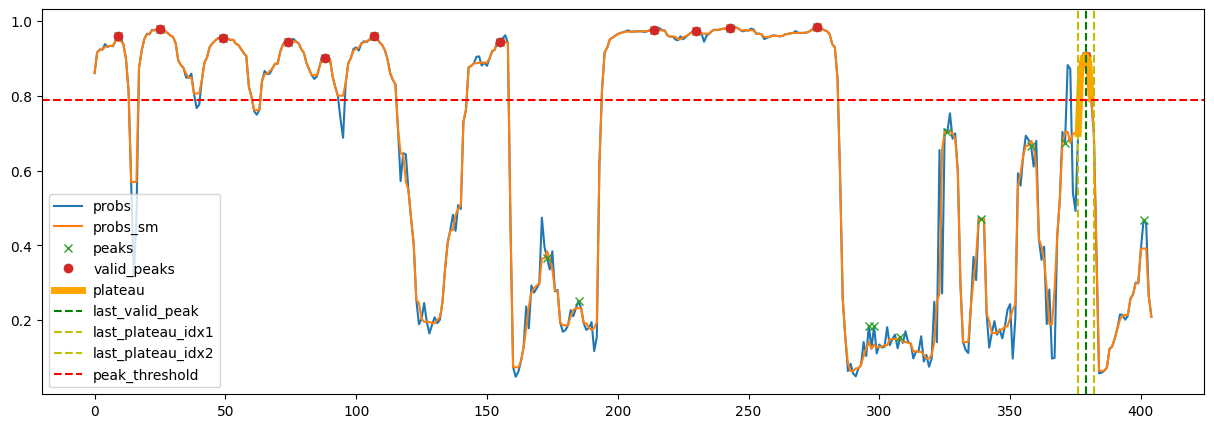

In [17]:
from scipy.signal import find_peaks, medfilt
import matplotlib.pyplot as plt

probs = torch.sigmoid(torch.from_numpy(new_outputs['0040187f-4627-4bfa-b141-89c1322fcd22_1']['ret_scores'])).numpy()
probs_sm = medfilt(probs, 5)
peaks, _ = find_peaks(probs_sm)
if peaks.size == 0:
    peaks = np.array([np.argmax(probs)])
max_peak_prob = probs[peaks].max()
peak_threshold = max_peak_prob * 0.8
valid_peaks = peaks[probs[peaks] >= peak_threshold]
if valid_peaks.size == 0:
    valid_peaks = np.array([np.argmax(probs)])
last_valid_peak = valid_peaks[-1]
last_plateau_idx1 = np.where(probs[:last_valid_peak] < peak_threshold)[0][-1]
last_plateau_idx2 = np.argmax(probs[last_valid_peak:] < peak_threshold) + last_valid_peak

bboxes = new_outputs['0040187f-4627-4bfa-b141-89c1322fcd22_1']['ret_bboxes'][last_plateau_idx1:last_plateau_idx2]
display(bboxes)

plt.figure(figsize=(15, 5))
plt.plot(probs, label='probs')
plt.plot(probs_sm, label='probs_sm')
plt.plot(peaks, probs[peaks], 'x', label='peaks')
plt.plot(valid_peaks, probs[valid_peaks], 'o', label='valid_peaks')
plt.plot(np.arange(last_plateau_idx1, last_plateau_idx2), probs[last_plateau_idx1:last_plateau_idx2], label='plateau', lw=5, color='orange')
plt.axvline(last_valid_peak, color='g', linestyle='--', label='last_valid_peak')
plt.axvline(last_plateau_idx1, color='y', linestyle='--', label='last_plateau_idx1')
plt.axvline(last_plateau_idx2, color='y', linestyle='--', label='last_plateau_idx2')
plt.axhline(peak_threshold, color='r', linestyle='--', label='peak_threshold')
plt.legend()
plt.show()

In [ ]:
result = {
    'version': '1.0.5',
    'challenge': 'ego4d_vq2d_challenge',
    'results': {
        'videos': [
        ]
    }
}

import json

anns = json.load(open('../data/vq_v2_val_anno.json'))
ann_tree = {}  # video_uid -> clip_uid -> annotation_uid -> qset_id -> prediction
for ann in anns:
    video_uid = ann['video_uid']
    clip_uid = ann['clip_uid']
    annotation_uid = ann['annotation_uid']
    qset_id = ann['query_set']

    qset_uuid = f'{annotation_uid}_{qset_id}'
    prediction = new_outputs[qset_uuid]
    ann_tree.setdefault(video_uid, {}).setdefault(clip_uid, {}).setdefault(annotation_uid, {})[qset_id] = prediction

display(ann_tree)


def get_response_track(output):
    probs = torch.sigmoid(torch.from_numpy(output['ret_scores'])).numpy()
    probs_sm = medfilt(probs, 5)
    peaks, _ = find_peaks(probs_sm)
    if peaks.size == 0:
        peaks = np.array([np.argmax(probs)])
    max_peak_prob = probs[peaks].max()
    peak_threshold = max_peak_prob * 0.8
    valid_peaks = peaks[probs[peaks] >= peak_threshold]
    if valid_peaks.size == 0:
        valid_peaks = np.array([np.argmax(probs)])
    last_valid_peak = valid_peaks[-1]
    last_plateau_idx1 = np.where(probs[:last_valid_peak] < peak_threshold)[0]
    if last_plateau_idx1.size == 0:
        last_plateau_idx1 = 0
        last_plateau_idx2 = len(probs) - 1
    else:
        last_plateau_idx1 = last_plateau_idx1[-1]
        last_plateau_idx2 = np.argmax(probs[last_valid_peak:] < peak_threshold) + last_valid_peak
    return output['ret_bboxes'][last_plateau_idx1:last_plateau_idx2], last_plateau_idx1, last_plateau_idx2


for video_uid, clips in ann_tree.items():
    result['results']['videos'].append({
        'video_uid': video_uid,
        'clips': []
    })
    for clip_uid, annotations in clips.items():
        result['results']['videos'][-1]['clips'].append({
            'clip_uid': clip_uid,
            'predictions': []
        })
        for annotation_uid, query_sets in annotations.items():
            result['results']['videos'][-1]['clips'][-1]['predictions'].append({
                'annotation_uid': annotation_uid,
                'query_sets': {}
            })
            for qset_id, prediction in query_sets.items():
                bboxes, fno_s, _ = get_response_track(prediction)
                bboxes = [{'fno': fno, 'x1': b[0], 'y1': b[1], 'x2': b[2], 'y2': b[3]} for fno, b in enumerate(bboxes.astype(int).tolist(), start=fno_s)]
                result['results']['videos'][-1]['clips'][-1]['predictions'][-1]['query_sets'][qset_id] = {
                    'bboxes': bboxes,
                    'score': 1.0
                }

In [ ]:
result

In [31]:
json.dump(result, open('../outputs/debug/2024-09-23/125921/evals.json', 'w'), indent=2)